In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skmob
from skmob.tessellation import tilers
from skmob.measures.individual import distance_straight_line, maximum_distance, number_of_visits, waiting_times, real_entropy
import math
from tqdm import tqdm
from numpy.linalg import norm
import traja
from scipy.stats import ks_2samp
import folium
from datetime import datetime
from skmob.models.epr import DensityEPR
import geopandas as gpd


/home/ryn/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
dat = pd.read_csv("Minute_Trajectories.csv")

In [5]:
print(dat.keys())
print(np.unique(dat['wall']))

Index(['minute_id', 'x', 'y', 't', 'id', 'dFrames', 's', 'v', 'a', 'disp',
       'theta', 'alpha', 'sin', 'cos', 'adist', 'wall', 'startDisp', 'endDisp',
       'antennaLx', 'antennaLy', 'antennaRx', 'antennaRy', 'legLx', 'legLy',
       'legRx', 'legRy', 'sub_traj_id'],
      dtype='object')
[0. 1.]


(array([7.000000e+00, 7.000000e+00, 1.000000e+00, 2.000000e+00,
        9.000000e+00, 6.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+01, 4.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.500000e+01,
        5.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.100000e+01, 2.000000e+00, 0.000000e+00,
        3.700000e+01, 2.200000e+01, 3.400000e+01, 4.800000e+01,
        4.300000e+01, 7.400000e+01, 1.580000e+02, 1.360000e+02,
        1.810000e+02, 1.800000e+02, 2.970000e+02, 5.590000e+02,
        7.790000e+02, 1.193000e+03, 1.974000e+03, 6.154000e+03,
        3.344760e+05, 3.125215e+06, 7.848000e+04, 4.128000e+03,
        1.796000e+03, 9.790000e+02, 6.630000e+02, 4.900000e+02,
        2.500000e+02, 2.000000e+02, 1.670000e+02, 1.570000e+02,
        1.260000e+02, 6.100000e+01, 3.00

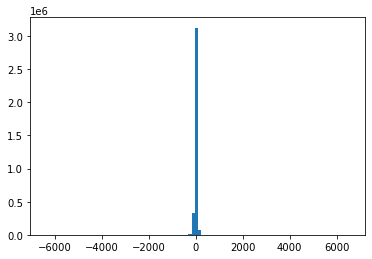

In [12]:
plt.hist(dat['a'],bins=100)

In [6]:
random_walks = []
for i in range(1000):
    df = traja.trajectory.generate(n=1500,random=True, seed = i)
    random_walks.append(df)
print(np.shape(random_walks))

(1000, 1500, 3)


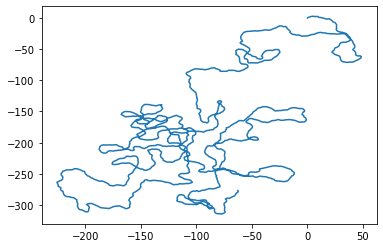

In [10]:
plt.plot(random_walks[1][:,0],random_walks[1][:,1])

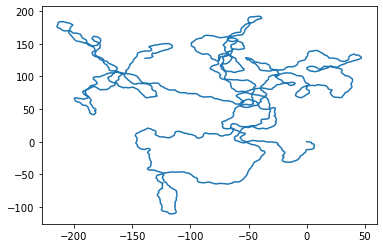

In [11]:
plt.plot(random_walks[2][:,0],random_walks[2][:,1])

In [12]:
correlated_walks = []
for i in range(1000):
    df = traja.trajectory.generate(n=1500,random=False,seed = i)
    correlated_walks.append(df)
print(np.shape(correlated_walks))

(1000, 1500, 3)


# Sampling from EPR

In [5]:
dt = np.asarray(100*dat['t'])
dat['datetime'] = dt
tdf_real = skmob.TrajDataFrame(dat, latitude='x',longitude='y',datetime="datetime", user_id='minute_id')

In [112]:
tessellation = tilers.tiler.get("squared", base_shape="rectangle", meters=0.5)


In [113]:
tessellation['minute_id'] = dat['minute_id']
tessellation['relevance'] = np.ones((np.shape(tessellation)[0]))
print(np.shape(tessellation))

(3674, 4)


In [114]:
# start_time = datetime.fromtimestamp(min(dat.loc[dat['minute_id'] == 1]['t']))
# end_time = datetime.fromtimestamp(max(dat.loc[dat['minute_id']==1]['t']))
start_time = pd.to_datetime('2019/01/01 08:00:00')
end_time = pd.to_datetime('2019/01/20 08:00:00')

In [115]:
print(start_time, end_time)

2019-01-01 08:00:00 2019-01-20 08:00:00


In [116]:
depr = DensityEPR(tau=0.1,gamma=0.1)
depr_gen = depr.generate(start_time, end_time, tessellation, n_agents=1, show_progress=True)




  0%|          | 0/1 [00:00<?, ?it/s]/home/ryn/anaconda3/lib/python3.8/site-packages/skmob/models/gravity.py:43: RuntimeWarning: divide by zero encountered in power
  return np.power(x, exponent)
100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


In [117]:
print(np.shape(depr_gen))

(317, 4)


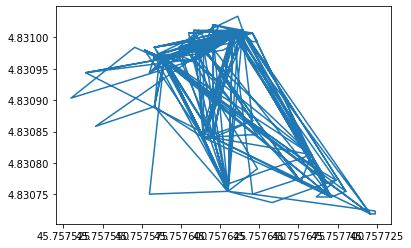

In [118]:
fig, ax = plt.subplots()
ax.plot(depr_gen['lat'],depr_gen['lng'])
ax.ticklabel_format(useOffset=False)
plt.show()

In [33]:
print(depr_gen['lat'])

0    45.766918
Name: lat, dtype: float64


In [38]:
url = skmob.utils.constants.NY_COUNTIES_2011
tessellation = gpd.read_file(url)
start_time = pd.to_datetime('2019/01/01 08:00:00')
end_time = pd.to_datetime('2019/01/14 08:00:00')
depr = DensityEPR()
t_d_f = depr.generate(start_time, end_time, tessellation, relevance_column='population', n_agents=100, show_progress=True)

  0%|          | 0/100 [00:00<?, ?it/s]/home/ryn/anaconda3/lib/python3.8/site-packages/skmob/models/gravity.py:43: RuntimeWarning: divide by zero encountered in power
  return np.power(x, exponent)
100%|██████████| 100/100 [00:05<00:00, 17.95it/s]


In [27]:
print(tessellation)

   tile_id  population                                           geometry
0    36019       81716  POLYGON ((-74.00667 44.88602, -74.02739 44.995...
1    36101       99145  POLYGON ((-77.09975 42.27421, -77.09966 42.272...
2    36107       50872  POLYGON ((-76.25015 42.29668, -76.24914 42.302...
3    36059     1346176  POLYGON ((-73.70766 40.72783, -73.70027 40.739...
4    36011       79693  POLYGON ((-76.27907 42.78587, -76.27535 42.780...
..     ...         ...                                                ...
57   36007      199346  POLYGON ((-75.85039 42.32773, -75.84379 42.259...
58   36065      234203  POLYGON ((-75.13504 43.24835, -75.12538 43.247...
59   36119      956265  POLYGON ((-73.94908 41.29259, -73.96698 41.301...
60   36091      221088  POLYGON ((-73.72266 42.82068, -73.72666 42.822...
61   36103     1498838  POLYGON ((-72.20859 40.88131, -72.37453 40.818...

[62 rows x 3 columns]


# Speed

In [78]:
s_mean_r = dat.groupby(['minute_id']).mean()['s']


In [8]:
random_walks = np.asarray(random_walks)
speeds = []
for i in range(1000):
    distancex = np.subtract(random_walks[i][1:,0],random_walks[i][:-1,0])
    distancey = np.subtract(random_walks[i][1:,1],random_walks[i][:-1,1])
    total_dist = np.sqrt(np.multiply(distancex, distancex)+np.multiply(distancey, distancey))
    times = np.subtract(random_walks[i][1:,2],random_walks[i][:-1,2])
    speedi = np.divide(total_dist,times)
    speeds.append(np.mean(speedi))


In [9]:
c_random_walks = np.asarray(correlated_walks)
c_speeds = []
speed_times = []
for i in range(1000):
    distancex = np.subtract(c_random_walks[i][1:,0],c_random_walks[i][:-1,0])
    distancey = np.subtract(c_random_walks[i][1:,1],c_random_walks[i][:-1,1])
    total_dist = np.sqrt(np.multiply(distancex, distancex)+np.multiply(distancey, distancey))
    times = np.subtract(random_walks[i][1:,2],random_walks[i][:-1,2])
    speedi = np.divide(total_dist,times)
    speed_times.append(speedi)
    c_speeds.append(np.mean(speedi))


NameError: name 'correlated_walks' is not defined

Text(0.5, 1.0, 'Random Walk Speed')

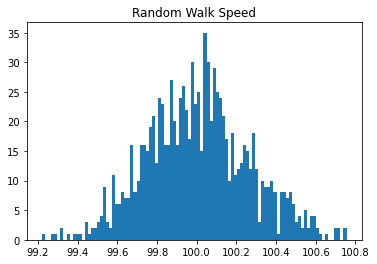

In [81]:
plt.hist(speeds,bins=100)
plt.title("Random Walk Speed")

Text(0.5, 1.0, 'Data Speed')

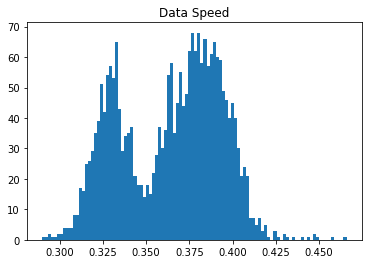

In [82]:
plt.hist(s_mean_r,bins=100)
plt.title("Data Speed")

Text(0.5, 1.0, 'Random Walk (correlated) speed')

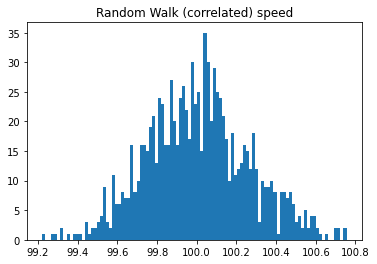

In [85]:
#Kolmogorov-Smirnov Test
ks_2samp(speeds, s_mean_r)

KstestResult(statistic=1.0, pvalue=5.551115123125783e-16)

# Acceleration

In [87]:
a_mean = dat.groupby(['minute_id']).mean()['a']


In [94]:
accels = []
print(np.shape(speed_times))
for i in range(1000):
    dspeed = np.subtract(speed_times[i][1:],speed_times[i][:-1])
#     distancey = np.subtract(random_walks[i][2:,1],random_walks[i][:-2,1])
#     total_dist = np.sqrt(np.multiply(distancex, distancex)+np.multiply(distancey, distancey))
    times = np.subtract(random_walks[i][2:,2],random_walks[i][:-2,2])
#     print(np.shape(times),np.shape())
    acceli = np.divide(dspeed,times)
    accels.append(np.mean(acceli))


(1000, 1499)


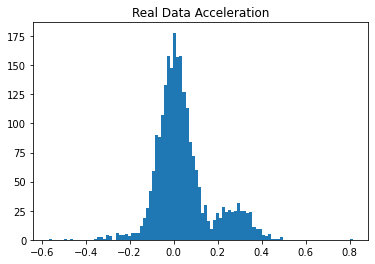

In [97]:
plt.hist(a_mean,bins=100)
plt.title("Real Data Acceleration")
plt.show()

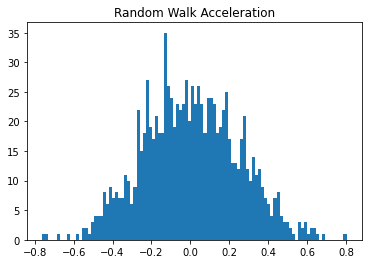

In [98]:
plt.hist(accels,bins=100)
plt.title("Random Walk Acceleration")
plt.show()

In [99]:
ks_2samp(a_mean, accels)

KstestResult(statistic=0.3010463548251159, pvalue=5.551115123125783e-16)